# Importing Libraries

In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sb
import matplotlib.pyplot as plt

In [0]:
data=pd.read_csv("telecom_churn_data.csv",header=None)

In [37]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# Renaming Columns

In [0]:
cols=['State','Account_length','Area_code','Phone','International_plan','VMail_plan','VMail_message','Day_mins','Day_calls','Day_charge','Eve_Mins','Eve_calls','Eve_charge','Night_mins','Night_calls','Night_charge','International_mins','International_calls','International_charge','CustServ_Calls','Churn']

In [0]:
data.columns=cols

In [40]:
data.head()

,State,Account_length,Area_code,Phone,International_plan,VMail_plan,VMail_message,Day_mins,Day_calls,Day_charge,Eve_Mins,Eve_calls,Eve_charge,Night_mins,Night_calls,Night_charge,International_mins,International_calls,International_charge,CustServ_Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


## Describing Data/


In [41]:
data.describe()

,Account_length,Area_code,VMail_message,Day_mins,Day_calls,Day_charge,Eve_Mins,Eve_calls,Eve_charge,Night_mins,Night_calls,Night_charge,International_mins,International_calls,International_charge,CustServ_Calls
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,100.645224,437.046350,7.849903,180.447152,100.054364,30.676576,200.429088,100.179770,17.036703,200.623933,99.944120,9.028185,10.279294,4.433831,2.775926,1.567035
std,39.597194,42.288212,13.592333,53.983540,19.883027,9.177145,50.557001,19.821314,4.297332,50.543616,19.935053,2.274488,2.757361,2.457615,0.744413,1.307019
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,165.900000,87.000000,14.100000,167.100000,87.000000,7.520000,8.600000,3.000000,2.320000,1.000000
50%,100.000000,415.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,17.000000,216.800000,113.000000,36.860000,234.000000,114.000000,19.890000,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
State                   4617 non-null object
Account_length          4617 non-null int64
Area_code               4617 non-null int64
Phone                   4617 non-null object
International_plan      4617 non-null object
VMail_plan              4617 non-null object
VMail_message           4617 non-null int64
Day_mins                4617 non-null float64
Day_calls               4617 non-null int64
Day_charge              4617 non-null float64
Eve_Mins                4617 non-null float64
Eve_calls               4617 non-null int64
Eve_charge              4617 non-null float64
Night_mins              4617 non-null float64
Night_calls             4617 non-null int64
Night_charge            4617 non-null float64
International_mins      4617 non-null float64
International_calls     4617 non-null int64
International_charge    4617 non-null float64
CustServ_Calls          4617 non-null

In [43]:
data.isnull().sum()

State                   0
Account_length          0
Area_code               0
Phone                   0
International_plan      0
VMail_plan              0
VMail_message           0
Day_mins                0
Day_calls               0
Day_charge              0
Eve_Mins                0
Eve_calls               0
Eve_charge              0
Night_mins              0
Night_calls             0
Night_charge            0
International_mins      0
International_calls     0
International_charge    0
CustServ_Calls          0
Churn                   0
dtype: int64

# Changing Categorical Variables to Numerical Variables (Using Label Encoders)

In [0]:
encode=LabelEncoder()

In [0]:
data.International_plan=encode.fit_transform(data.International_plan)
data.VMail_plan=encode.fit_transform(data.VMail_plan)
data.Churn=encode.fit_transform(data.Churn)


In [46]:
data.head()

,State,Account_length,Area_code,Phone,International_plan,VMail_plan,VMail_message,Day_mins,Day_calls,Day_charge,Eve_Mins,Eve_calls,Eve_charge,Night_mins,Night_calls,Night_charge,International_mins,International_calls,International_charge,CustServ_Calls,Churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


# VISUALISING  DATA  AGAINST  VARIOUS  PARAMETERS

# Area Code vs churn

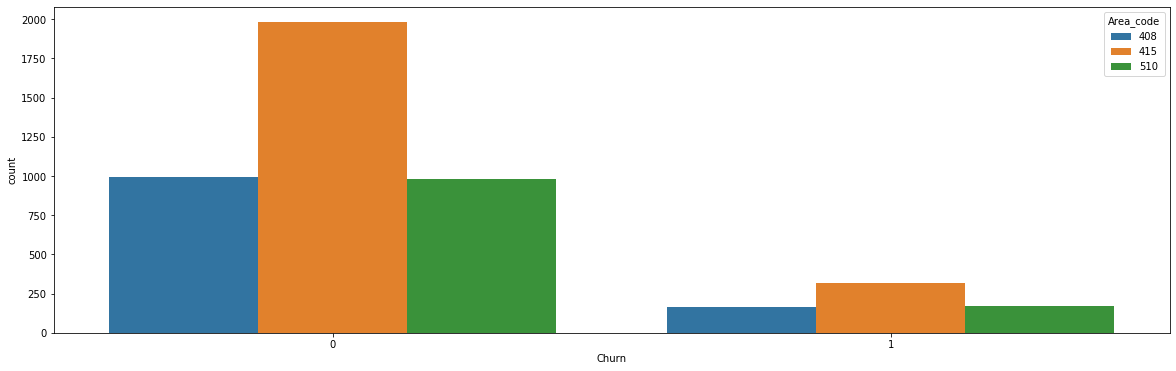

In [47]:
sb.countplot(x='Churn',data=data,hue='Area_code')

#  People who have international plan vs churn

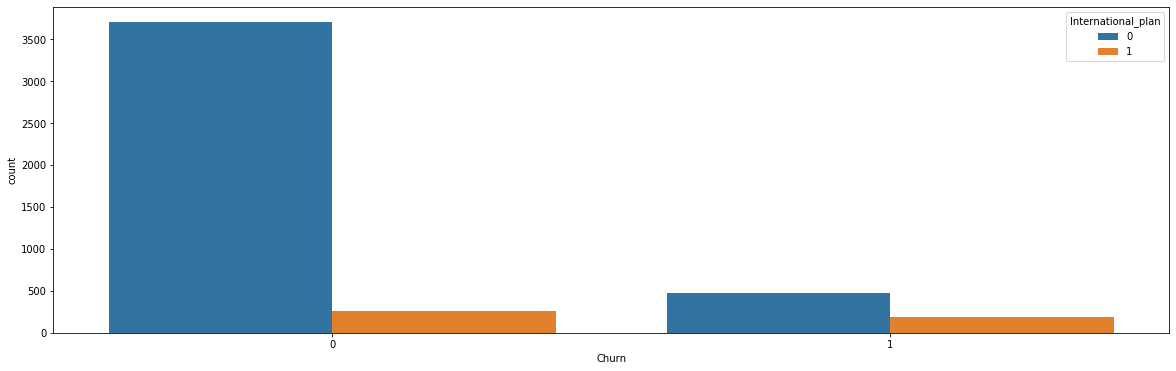

In [48]:
sb.countplot(x='Churn',data=data,hue='International_plan')

# People who have Vmail plan vs churn

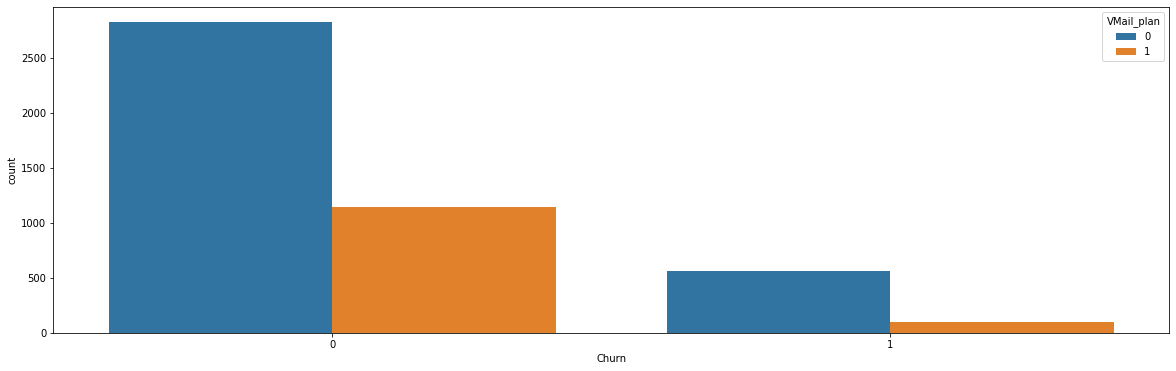

In [49]:
sb.countplot(x='Churn',data=data,hue='VMail_plan')

# Day Charge

In [0]:
x=data.Day_charge

<function matplotlib.pyplot.show>

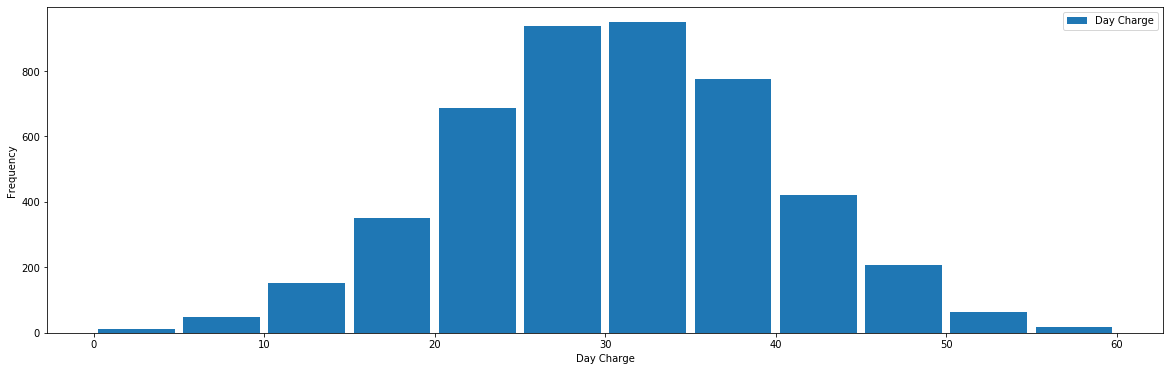

In [51]:
bin=[0,5,10,15,20,25,30,35,40,45,50,55,60]
plt.hist([x],rwidth=0.9,bins=bin)
legend=['Day Charge']
plt.legend(legend)
plt.ylabel('Frequency')
plt.xlabel('Day Charge')
plt.show

# Night Charge

<function matplotlib.pyplot.show>

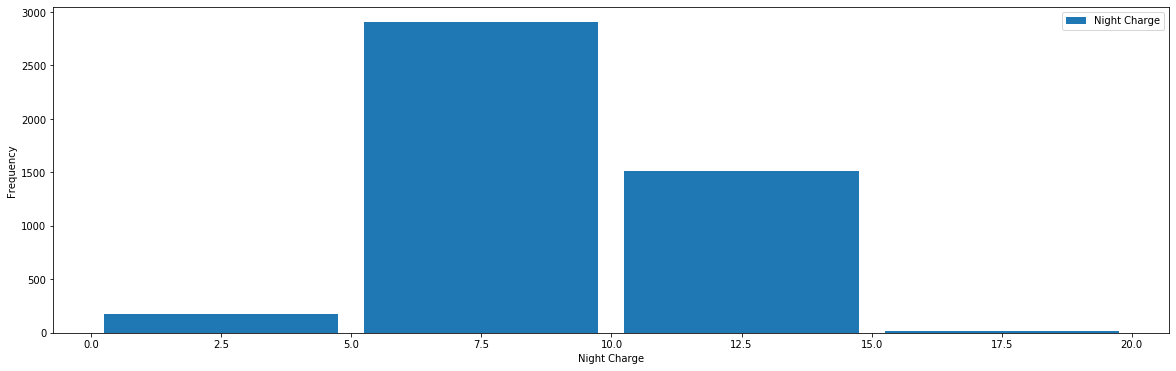

In [52]:
x=data.Night_charge
bin=[0,5,10,15,20]
plt.hist([x],rwidth=0.9,bins=bin)
legend=['Night Charge']
plt.legend(legend)
plt.ylabel('Frequency')
plt.xlabel('Night Charge')
plt.show


# International charge

<function matplotlib.pyplot.show>

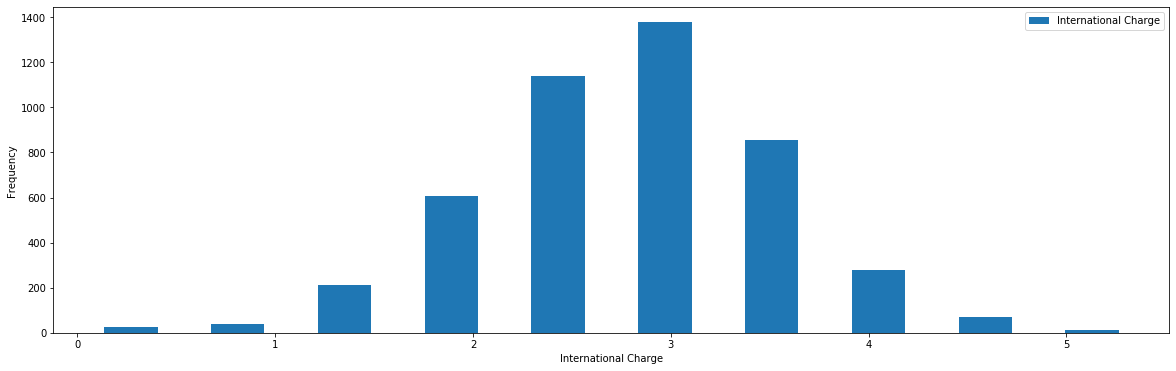

In [53]:
x=data.International_charge

plt.hist([x],rwidth=0.5)
legend=['International Charge']
plt.legend(legend)
plt.ylabel('Frequency')
plt.xlabel('International Charge')
plt.show

# State vs Churn

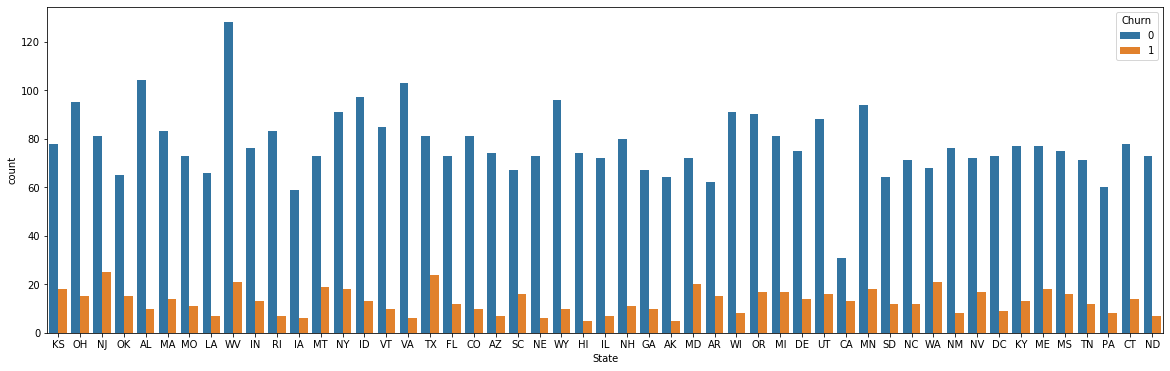

In [54]:
plt.rcParams['figure.figsize']=[20,6]
sb.countplot(x='State',data=data,hue='Churn')

# Applying ML Algorithms

In [0]:
x=data.iloc[:,4:-1]

In [56]:
x.head()


,International_plan,VMail_plan,VMail_message,Day_mins,Day_calls,Day_charge,Eve_Mins,Eve_calls,Eve_charge,Night_mins,Night_calls,Night_charge,International_mins,International_calls,International_charge,CustServ_Calls
0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [0]:
y=data.Churn

In [58]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64

# Dividing The data for training and testing

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

# Applying Classification Algorithms
   
   
   

# Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
model=LogisticRegression()

In [63]:
model.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predict=model.predict(x_test)

In [0]:
#Checking Accuracy now

In [0]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [67]:
accuracy_score(y_test,predict)

0.8787878787878788

In [68]:
confusion_matrix(y_test,predict)

array([[992,  24],
       [116,  23]])

# Decision Tree 

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
model =DecisionTreeClassifier()

In [71]:
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
y_predict=model.predict(x_test)

In [0]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [74]:
accuracy_score(y_test,y_predict)

0.90995670995671

In [75]:
confusion_matrix(y_test,y_predict)

array([[951,  65],
       [ 39, 100]])

# Random Forest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
model=RandomForestClassifier(n_estimators=10)#n_Estimators means no. of trees to be constructed

In [78]:
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_predict=model.predict(x_test)

In [0]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [81]:
accuracy_score(y_test,y_predict)

0.961038961038961

In [82]:
confusion_matrix(y_test,y_predict)

array([[1007,    9],
       [  36,  103]])


# XGBOOST

In [0]:
from xgboost import XGBClassifier

In [0]:
model=XGBClassifier()

In [85]:
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
predict=model.predict(x_test)

In [0]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [88]:
confusion_matrix(y_test,predict)

array([[1009,    7],
       [  33,  106]])

In [89]:
accuracy_score(y_test,predict)

0.9653679653679653

# Summary -->


# Logistic Regression -87.01% 

# Decision tree -93.5%

# Random Forest Classifier-95.5%

# XGBOOST -95.4%